# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 8th, 2024

<hr style="border:1px solid black"> </hr>

In [ ]:
### Student Name: 

Complete the following exercises and push your notebook on Github: submit your Github handle on StudiUM.

In a terminal : 

1. Go in the same directory as your notebook: `cd path_to_your_notebook/`
2. Commit the change made to your notebook: `git commit -am "add_your_personalized_note"`
3. Push your commit on Github: `git push origin main`

Go to Github and double check that the pushed Notebook is the version you want to hand in.

In [5]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of $N$ breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression. To do so you will be using various methods presented through out the class.

## Import the data [10 pts]

Your dataset concist of three files: 
1. `genes_id.txt`
2. `patient_subtype.txt`
3. `patient_expression.txt`. 

Import the various files and build your dataset daframe. You should have for each patient her/his gene expression profil and clinical subtypes. Use the gene IDs as identifier for the columns or row names (you choose how to build your dataframe).

### Import the files individually [3 pts]

In [58]:
genes_id = pd.read_csv("/u/francoij/Untitled Folder/code_github/datasets/genes_id.txt",header=None)
patient_subtype = pd.read_csv("/u/francoij/Untitled Folder/code_github/datasets/patient_subtype.txt",header=None)
patient_expression = pd.read_csv("/u/francoij/Untitled Folder/code_github/datasets/patient_expression.txt",sep=' ', header=None)

### How many patient are you considering? [1 pt]

In [59]:
print(len(patient_expression), "patients")

645 patients


### How many genes are you considering? [1 pt]

In [60]:
print(len(genes_id), "gènes")

47 gènes


### Combine the data from all three files into one dataframe [5 pts]
You can use one of the dataframe as the 'main' one, and then rename its columns and add a new column.

**Show a preview/overview of your dataframe**

In [61]:
genes_id.head()

,0
0,ENSG00000011426.9
1,ENSG00000054598.6
2,ENSG00000062038.12
3,ENSG00000077152.8
4,ENSG00000082175.13


In [62]:
data = patient_expression.copy()
data.columns = genes_id[0]
data.loc[:, "patient_subtype"] = patient_subtype.iloc[:,0]
data


,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,patient_subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal


## Explore the dataset [15 pts]

### How many subtypes are you considering? [1 pts]

In [63]:
print(len(data.groupby("patient_subtype")), "patient_subtype")

5 patient_subtype


### How many patients are associtated to each subtype? [2 pts]

In [64]:
print("patient_subtype",data.loc[:,"patient_subtype"].unique())
data.groupby("patient_subtype").count()

patient_subtype ['Basal' 'LumA' 'LumB' 'Her2' 'Normal']


,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
patient_subtype,,,,,,,,,,,,,,,,,,,,,
Basal,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
Her2,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
LumA,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
LumB,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
Normal,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


In [128]:
print("il y a 191 patient associés à Basal, 82 à Her2, 179 à LumA, 165 à LumB et 28 à normal.")

il y a 191 patient associés à Basal, 82 à Her2, 179 à LumA, 165 à LumB et 28 à normal.


### Generate a graph showing the distribution of the average expression of each gene [5 pts]

               gene_id  mean_expression
0    ENSG00000011426.9         2.164062
1    ENSG00000054598.6         1.535686
2   ENSG00000062038.12         2.102870
3    ENSG00000077152.8         3.132112
4   ENSG00000082175.13         1.179845
5   ENSG00000089685.13         2.554557
6   ENSG00000091831.20         2.491631
7   ENSG00000092621.10         2.452480
8    ENSG00000094804.8         1.803410
9    ENSG00000099953.8         3.506780
10  ENSG00000101057.14         2.927418
11  ENSG00000104332.10         2.226754
12  ENSG00000105173.12         1.360070
13   ENSG00000106605.9         3.432338
14  ENSG00000107262.15         2.479991
15  ENSG00000115648.12         2.966889
16  ENSG00000117399.12         2.978518
17  ENSG00000117724.11         2.402607
18  ENSG00000128422.14         2.524521
19   ENSG00000129514.5         3.439974
20  ENSG00000133627.16         1.146421
21  ENSG00000134057.13         3.088703
22  ENSG00000135679.20         2.056612
23  ENSG00000136997.13         3.338576


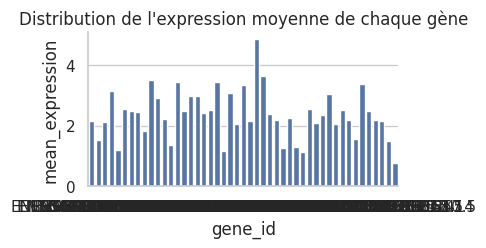

In [66]:

patient_expression.columns = genes_id[0]
patient_expression.loc[:, "patient_subtype"] = patient_subtype.iloc[:, 0]

mean_expression = patient_expression.loc[:, genes_id[0]].mean()
mean_expression_df = pd.DataFrame()
mean_expression_df["gene_id"] = mean_expression.index
mean_expression_df["mean_expression"] = mean_expression.values
print(mean_expression_df)

sns.set(rc={'figure.figsize': (4, 2)})
sns.set_theme(context="notebook", style="whitegrid")
p = sns.barplot(data=mean_expression_df, x="gene_id", y="mean_expression")
p.set_title("Distribution de l'expression moyenne de chaque gène")
sns.despine()

### What are the two genes with the largest standard deviation for all patient? [2 pts]
To answer this question, you can use the `df.std()` and `df.sort_values()`. You can look into the doc for more informations on these two functions.
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [69]:

deviation_standard = patient_expression.drop(columns=["patient_subtype"]).std()

deviation_standard_sortie = deviation_standard.sort_values(ascending=False)
deux_genes = deviation_standard_sortie.head(2)

print("Les deux gènes avec la plus grande déviation standard sont :")
print(deux_genes)



Les deux gènes avec la plus grande déviation standard sont :
0
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64


### Compare the expression of these two genes: are they corrolated based on tumor subtypes? [5 pts]
The two genes to consider are **ENSG00000186081.10** and **ENSG00000128422.14**.

To answer this question: 
1. Make a figure showing the correlation between the two genes by clinical subtypes,
2. Calculate a correlation coefficient for each comparison and,
3. Briefly interpret your results (make sure your interpretation is consistent with the correlation coefficient used).

Corrélation de Pearson pour Basal: 0.5544
Corrélation de Pearson pour LumA: 0.8914
Corrélation de Pearson pour LumB: 0.8974
Corrélation de Pearson pour Her2: 0.7363
Corrélation de Pearson pour Normal: 0.5351


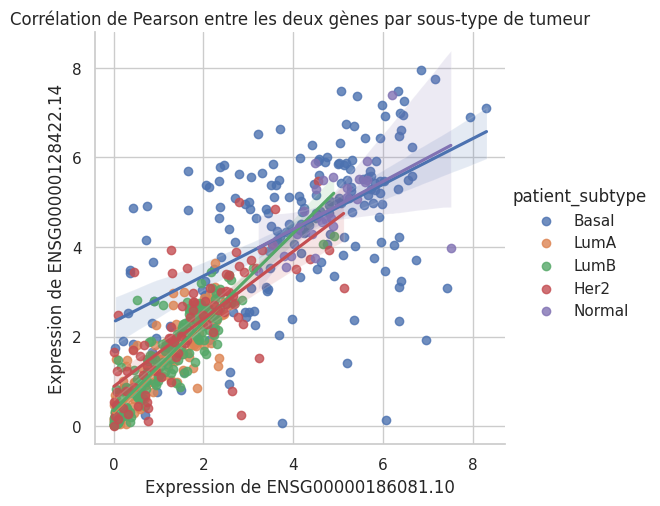

In [71]:

data_selectionnees = patient_expression[["ENSG00000186081.10", "ENSG00000128422.14", "patient_subtype"]]

for subtype in data_selectionnees['patient_subtype'].unique():
    subset = data_selectionnees[data_selectionnees['patient_subtype'] == subtype]
    pearson_corr = pearsonr(subset['ENSG00000186081.10'], subset['ENSG00000128422.14'])
    correlations[subtype] = pearson_corr[0]
    
for subtype, corr in correlations.items():
    print(f"Corrélation de Pearson pour {subtype}: {corr:.4f}")
    
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_theme(context="notebook", style="whitegrid")
p = sns.lmplot(data=data_selectionnees, x="ENSG00000186081.10", y="ENSG00000128422.14", hue='patient_subtype')
p.set(xlabel='Expression de ENSG00000186081.10', ylabel='Expression de ENSG00000128422.14', title='Corrélation de Pearson entre les deux gènes par sous-type de tumeur')
sns.despine()


In [27]:
print("Les gènes ENSG00000186081.10 et ENSG00000128422.14 montrent une forte corrélation linéaire positive dans les sous-types LumA (0.8914) et LumB (0.8974). Les corrélations linéaires sont plus modérées dans les sous-types Basal (0.5544), Her2 (0.7363), et Normal (0.5351).")

Les gènes ENSG00000186081.10 et ENSG00000128422.14 montrent une forte corrélation linéaire positive dans les sous-types LumA (0.8914) et LumB (0.8974). Les corrélations linéaires sont plus modérées dans les sous-types Basal (0.5544), Her2 (0.7363), et Normal (0.5351).


## Clustering [25 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype. To answer this question, you first want to apply a dimensionality reduction algorithm to your dataset. You then want to apply a clustering alogirthme to the reduced components, and compare the clustering labels to the clinical subtype of each patient.

### Apply a PCA Dimensionality reduction to your gene expression dataset [4 pts]

Once you selected the numerical gene expression, scale the value and initiate a PCA object. You want to reduce your set of features to **25 components**.

In [72]:
subset_PCA = data.iloc[:, 0:25]

scaler = sklearn.preprocessing.StandardScaler()
subset_scaled = scaler.fit_transform(subset_PCA)

pca = sklearn.decomposition.PCA(n_components=25)
pca.fit(subset_scaled)

PCA(n_components=25)

### What percentage of the variance of the dataset is explained by the two first component? [2 pt]

In [73]:
explained_variance = pca.explained_variance_[:2]
explained_variance
total_variance = np.sum(explained_variance)

percentage_variance_explained = (total_variance / np.sum(pca.explained_variance_)) * 100
percentage_variance_explained

np.float64(60.86797918260155)

### Apply the PCA onto your gene expression data and create a DataFrame with the PCs and the clinical patient subtypes [4 pts]
**Show a preview/overview of your dataframe**

In [74]:
pca_reduce = pca.fit_transform(subset_scaled)
pca_reducedata_reduce= pd.DataFrame(pca_reduce)
data_reduce.loc[:, "patient_outcomes"] = data.columns
data_reduce

NameError: name 'data_reduce' is not defined

### Plot a figure showing the two first PCs and color the samples by their clinical subtype [3 pts]
Do you think the k-means algorithm will be able to accurately cluster patients based on their clinical subtype? Why?

### Apply the K-means algorithme to your reduced dataset [5 pts]
When applying the K-means, you should use all 25 PCs, generated by your PCA. Add the k-means labels to your reduced dataset.

### What value of k did you use and why? [2 pt]

### Compare your k-means labels to the clinical substypes [5 pts]
You comparison can by qualitative and/or quantitative.

**Are you able to cluster patient by clinical substypes from your subset of gene expressions? Briefly describe and interpret your results.**